In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from src.network import Network_custom

BYU_UW_root = r"G:\.shortcut-targets-by-id\1k1B8zPb3T8H7y6x0irFZnzzmfQPHMRPx\Illimited Lab Projects\Research Projects\Spiders\BYU-UW"

In [2]:
# Example network: vertices and edges
vertices = np.array([[0, 0], [1, 0], [0, 1]])  # Initial positions
edges = [(0, 1), (1, 2), (2, 0)]  # Edge pairs
goal_lengths = [1.5, 1.2, 1.0]  # Desired edge lengths

# Objective function
def error_function(flat_coords):
    coords = flat_coords.reshape(-1, 2)
    error = 0
    for (i, j), L_ij in zip(edges, goal_lengths):
        dist = np.linalg.norm(coords[i] - coords[j])
        error += (dist - L_ij) ** 2
    return error

# Initial positions flattened
initial_guess = vertices.flatten()

# Minimize the error
result = minimize(error_function, initial_guess, method='L-BFGS-B')
optimized_coords = result.x.reshape(-1, 2)

# Results
print("Optimized Vertex Positions:")
print(optimized_coords)

print("Error per edge:")
for (i, j), L_ij in zip(edges, goal_lengths):
    dist = np.linalg.norm(optimized_coords[i] - optimized_coords[j])
    print(f"Edge {i}-{j}: {dist - L_ij:.3f}")


Optimized Vertex Positions:
[[-0.33478697 -0.00701582]
 [ 1.1563534   0.155775  ]
 [ 0.1784335   0.85124077]]
Error per edge:
Edge 0-1: 0.000
Edge 1-2: -0.000
Edge 2-0: -0.000


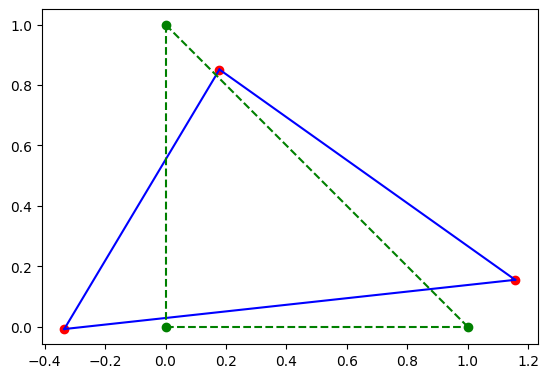

In [3]:
fig, ax = plt.subplots()
ax.plot(optimized_coords[:, 0], optimized_coords[:, 1], 'ro')
for (i, j) in edges:
    ax.plot([optimized_coords[i, 0], optimized_coords[j, 0]],
            [optimized_coords[i, 1], optimized_coords[j, 1]], 'b-')
    
ax.plot(vertices[:, 0], vertices[:, 1], 'go')
for (i, j) in edges:
    ax.plot([vertices[i, 0], vertices[j, 0]],
            [vertices[i, 1], vertices[j, 1]], 'g--')

ax.set_aspect('equal')
plt.show()

In [4]:
# Note that the coordinates of the vertices will change after equilibrium is reached.
model_name  = 'Validation_structure_1'
vertices    = np.array([[-10, 0, 0], [-5, 0,0], [0, 0, 0], [5, 0, 0], [10, 0, 0], [0,-10,0], [0,-5,0], [0,5,0], [0,10,0]])*10  # The coordinates of the vertices in mm
edges       = [[0, 1], [1, 2], [2, 3], [3, 4], [5, 6], [6, 2], [2, 7], [7, 8], [1, 6], [6, 3], [3, 7], [7,1]]                  # The edges of the network.
paths       = [[0, 1, 2, 3], [4, 5, 6,7], [11, 8, 9, 10]]   # 3D printable paths. Ensure an edge is not flipped.
directions  = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]          # Flip the curvature of an edge by setting the direction to -1.

q_ring      = .5
q_connectors = .5
q_center    = .1
q           = np.array([q_connectors, q_center, 2*q_center, q_connectors/2, q_connectors, q_center, q_center, q_connectors, q_ring, q_ring, q_ring, q_ring])/20
fixed       = [0, 4, 5, 8]

# Create the network
net = Network_custom.from_fd(vertices, edges, q, fixed, paths = paths, dir = directions)
TPU = {'E':130, 'v':0.3897, 'p':1.18e-9, 'A':0.11*0.71, 'name': 'TPU conductive'}
net.set_material(TPU)
E = [TPU['E']]*len(net.edges)
A = [TPU['A']]*len(net.edges)
goal_lengths, l_scalar = net.materialize(E, A)

reference_point = [0,0,0]                         # The network will be scaler relative to this point
net.scale_vertices(reference_point, net.l_scalar)

net.net_plot(color=True, elables = True, vlabels = False)

c:\Users\thijs\Documents\GitHub\printing-tensioned-structures\src\network.py:151: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  A = spsolve(EA, Q.dot(L)) + I
c:\Users\thijs\Documents\GitHub\printing-tensioned-structures\src\network.py:151: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  A = spsolve(EA, Q.dot(L)) + I


In [5]:
# Objective function
def error_function(flat_coords):
    coords = flat_coords.reshape(-1, 2)
    error = 0
    for (i, j), L_ij in zip(edges, goal_lengths):
        dist = np.linalg.norm(coords[i] - coords[j])
        error += (dist - L_ij) ** 2
    return error

# Initial positions flattened
initial_guess = vertices[...,:2].flatten()

# Minimize the error
result = minimize(error_function, initial_guess, method='L-BFGS-B')
optimized_coords = result.x.reshape(-1, 2)

# Results
print("Optimized Vertex Positions:")
print(optimized_coords)

print("Error per edge before and after, or simpely scaled:")
for (i, j), L_ij in zip(edges, goal_lengths):
    dist = np.linalg.norm(optimized_coords[i] - optimized_coords[j])
    dist_orig = np.linalg.norm(vertices[i] - vertices[j])
    dist_scaled = np.linalg.norm(net.vertices_scaled[i] - net.vertices_scaled[j])

    print(f"Edge {i}-{j}: from {dist_orig -  L_ij:.3f} to  {dist - L_ij:.3f}. Scaled: {dist_scaled - L_ij:.3f}")

net.vertices[...,:2] = optimized_coords

net.net_plot(color=True, elables = True, vlabels = False)

Optimized Vertex Positions:
[[-8.23060240e+01 -7.90590860e-06]
 [-2.79559249e+01 -9.66968872e-06]
 [ 9.85342058e-01 -5.83785206e-05]
 [ 1.65680475e+01 -8.46772667e-05]
 [ 9.74785604e+01 -1.21641805e-05]
 [-1.60792718e-01 -8.83609661e+01]
 [-2.22434597e+00 -2.91804569e+01]
 [-2.22424783e+00  2.91803515e+01]
 [-1.60768822e-01  8.83608626e+01]]
Error per edge before and after, or simpely scaled:
Edge 0-1: from -4.350 to  -0.000. Scaled: -0.752
Edge 1-2: from 20.151 to  -0.907. Scaled: -3.972
Edge 2-3: from 33.187 to  -1.231. Scaled: -2.210
Edge 3-4: from -30.911 to  0.000. Scaled: -4.151
Edge 5-6: from -9.216 to  -0.000. Scaled: 0.000
Edge 6-2: from 19.165 to  -1.479. Scaled: -4.090
Edge 2-7: from 19.165 to  -1.479. Scaled: -4.090
Edge 7-8: from -9.216 to  -0.000. Scaled: 0.000
Edge 1-6: from 32.491 to  0.686. Scaled: -2.181
Edge 6-3: from 37.139 to  1.137. Scaled: -2.311
Edge 3-7: from 37.139 to  1.137. Scaled: -2.311
Edge 7-1: from 32.491 to  0.686. Scaled: -2.181
